In [1]:
%pylab nbagg
#%matplotlib notebook

import cma, como
# Set parameters
dimension = 20
num_kernels = 15

list_of_solvers = como.get_cmas(num_kernels * [dimension * [0]], 0.2)
moes = como.Sofomore(list_of_solvers, reference_point = [11,11])



Populating the interactive namespace from numpy and matplotlib


In [2]:
fitness = como.FitFun(cma.ff.sphere, lambda x: cma.ff.sphere(x-1))
#g = lambda x: x[0] > 0.3
while not moes.stop():
#for i in range(100):
    solutions = moes.ask()
    objective_values = [fitness(x) for x in solutions]
#    g_values = [g(x) for x in solutions]
#    moes.tell(solutions, objective_values, [g_values])
    moes.tell(solutions, objective_values)
    moes.disp()
    moes.logger.add()


Iterat #Fevals   Hypervolume   axis ratios   sigmas   min&max stds
                                  (median)  (median)    (median)
    1     12 0.000000000000000e+00 1.0e+00 2.00e-01  2e-01  2e-01
    2     24 0.000000000000000e+00 1.0e+00 2.00e-01  2e-01  2e-01
    3     36 0.000000000000000e+00 1.0e+00 2.00e-01  2e-01  2e-01
  100   1200 2.929794673674537e+01 1.3e+00 2.30e-01  2e-01  2e-01
  200   2400 4.622931449397738e+01 1.6e+00 2.62e-01  2e-01  3e-01
  300   3600 4.774621325433127e+01 1.6e+00 2.04e-01  2e-01  2e-01
  400   4800 5.264733496197835e+01 1.7e+00 1.53e-01  1e-01  2e-01
  500   6000 5.458055535065167e+01 1.7e+00 1.13e-01  1e-01  1e-01
  600   7200 5.598835430605696e+01 1.7e+00 9.07e-02  8e-02  9e-02
  700   8400 5.645937481986986e+01 1.7e+00 6.97e-02  6e-02  7e-02
  800   9600 5.758897711876751e+01 1.7e+00 5.60e-02  5e-02  6e-02
  900  10800 5.794766622143084e+01 1.6e+00 4.65e-02  4e-02  5e-02
 1000  12000 5.845956502276135e+01 1.7e+00 3.31e-02  3e-02  3e-02
 1100  132

<IPython.core.display.Javascript object>


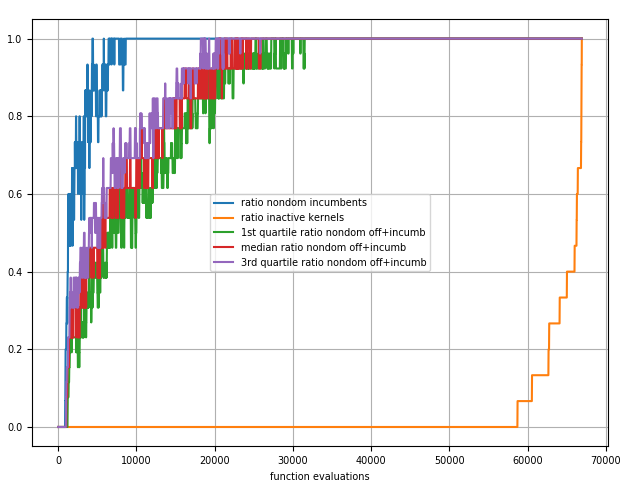

In [3]:
moes.logger.plot_ratios()

<IPython.core.display.Javascript object>


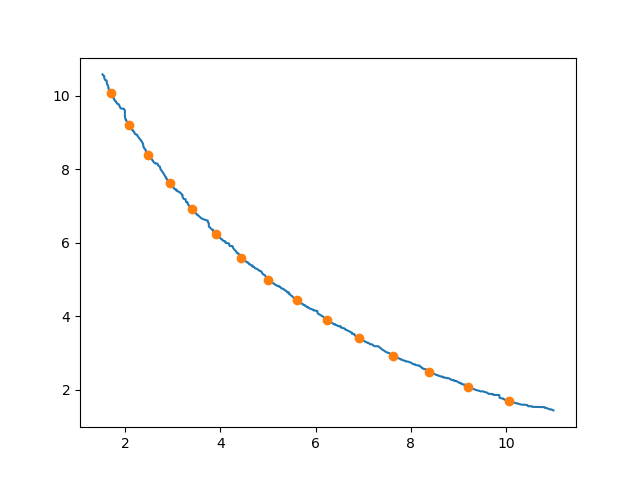

In [4]:
figure()
moes.logger.plot_front()

<IPython.core.display.Javascript object>


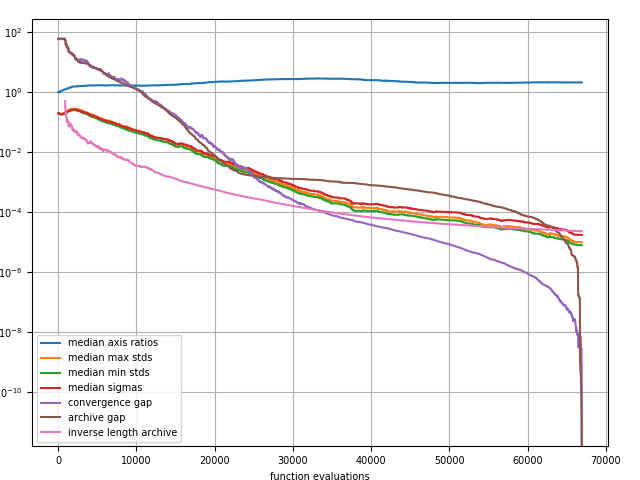

/Users/tourealite/Downloads/______phD/code-mo/python/sofomore_logger.py:547: RuntimeWarning: divide by zero encountered in long_scalars
  pyplot.semilogy(absciss_hypervolume, [1/u for u in res_hypervolume[2]],


In [5]:
figure()
moes.logger.plot_divers()

<IPython.core.display.Javascript object>


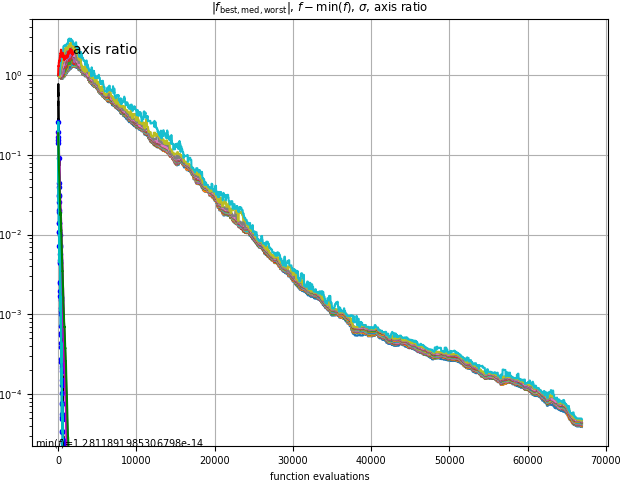

In [6]:
figure()
moes.logger.plot_stds()

In [ ]:
len(myres[2])

In [ ]:

import ast
f = open(filename)
tab = [line.rstrip() for line in f.readlines()[1:]] #the first 
newtab = [list(map(ast.literal_eval,line.split(maxsplit = 2))) for line in tab]

In [ ]:
len(newtab[0])

In [ ]:
newtab[0][2]

In [ ]:
moes.logger.plot_ratios()

In [ ]:
moes.logger.plot_divers()

In [ ]:
moes.logger.plot_divers()

In [ ]:
%pdb

In [7]:
es = cma.CMAEvolutionStrategy(10 * [0], 0.2)

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=419452, Thu Sep 12 15:11:59 2019)


In [8]:
es.optimize(cma.ff.sphere)

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 1.933139141877233e-01 1.0e+00 1.86e-01  2e-01  2e-01 0:00.0
    2     20 2.576252101579338e-01 1.2e+00 1.70e-01  2e-01  2e-01 0:00.0
    3     30 1.516971195350456e-01 1.2e+00 1.52e-01  1e-01  2e-01 0:00.0
  100   1000 9.398571255187126e-08 1.7e+00 2.47e-04  9e-05  1e-04 0:00.1
  191   1910 1.679177164415153e-14 1.9e+00 2.56e-07  4e-08  5e-08 0:00.2


<IPython.core.display.Javascript object>


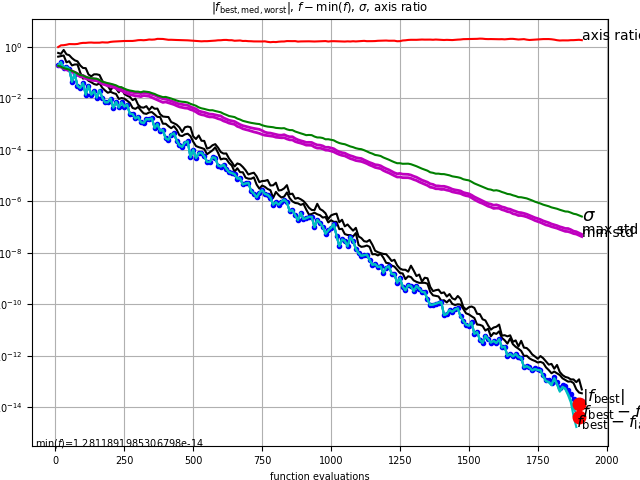

In [10]:
figure()
es.logger.plot_divers()

In [ ]:
cma.plot('cma_kern')

In [ ]:
if moes.nda is None:
    moes.nda = BNDSL if len(objective_values[0]) == 2 else NDL
for i in range(len(moes._told_indices)):
    moes.kernels[moes._told_indices[i]].objective_values = objective_values[i]

if moes.reference_point is None:
    pass #write here the max among the kernel.objective_values       
moes.front = moes.nda([kernel.objective_values for kernel in moes.kernels],
                 moes.reference_point)



In [ ]:
ikernel, offspring = moes._offspring[0]

In [ ]:
start = len(moes._told_indices)

In [ ]:
print(start)

In [ ]:
kernel = moes.kernels[ikernel]
fit = kernel.objective_values
if fit in moes.front: # i.e. if fit is not dominated and dominates               # the reference point
    moes.front.remove(fit)

In [ ]:
hypervolume_improvements = [moes.front.hypervolume_improvement(
                    point) for point in objective_values[start:start+len(offspring)]]
moes.front.add(fit) # in case num_kernels > 1
            


In [ ]:
plt.yscale?

In [ ]:
constraints_values = [[g(x) for x in solutions]]

In [ ]:
g_values = [constraint[start:start+len(offspring)] \
            for constraint in constraints_values]
penalized_f_values = mo.RankPenalizedFitness([-float(u) for u in 
                    hypervolume_improvements], g_values)


In [ ]:
import cma

In [ ]:
cma.utilities.utils.ElapsedWCTime?

In [ ]:
es.timer.elapsed

In [ ]:
%pylab nbagg
%matplotlib notebook

In [ ]:
import cma

In [ ]:
es = cma.CMAEvolutionStrategy(15 * [1], 0.2)

In [ ]:
es.optimize(cma.ff.sphere)

In [ ]:
es.plot()

In [ ]:
es.logger.plot_divers()

In [ ]:
es.logger.plot_divers()

In [ ]:
fn_axis_ratios = 'median_axis_ratios.dat'
fn_max_stds = 'median_max_stds.dat'
fn_min_stds = 'median_min_stds.dat' 
fn_sigmas = 'median_sigmas.dat'
fn_hypervolume = 'hypervolume.dat'
fn_archive = 'hypervolume_archive.dat' 
fn_len_archive = 'len_archive.dat' 

filenames = fn_axis_ratios, fn_max_stds, fn_min_stds, fn_sigmas,
fn_hypervolume, fn_archive, fn_len_archive

In [ ]:
filenames